<a href="https://colab.research.google.com/github/gerv94/MNA-TC4029.10/blob/main/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Germán Eduardo Rodríguez Vázquez
*   MATRÍCULA: A01796325

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analitica de Datos/Actividad 5"
os.chdir(DIR)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [37]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


*Con la simple observación del output de .info(), podemos decir que el DataFrame contiene 11 variables de texto o categóricas y 139 variables numéricas o cuantitativas, de las cuales 134 son continuas y 5 son discretas*

*Podemos obtener estos datos de forma programatica de la siguiente forma:*

In [38]:
categorical_df = response_df.select_dtypes(include=object)
num_categorical = len(categorical_df.columns)

numeric_df = response_df.select_dtypes(include=[np.number])
num_numeric = len(numeric_df.columns)
num_continuous = len(numeric_df.select_dtypes(include=np.float64).columns)
num_discrete = len(numeric_df.select_dtypes(include=np.int64).columns)

print(f"Variables de texto o categóricas: {num_categorical}")
print(f"Variables numéricas: {num_numeric}")
print(f"Variables continuas: {num_continuous}")
print(f"Variables discretas: {num_discrete}")

Variables de texto o categóricas: 11
Variables numéricas: 139
Variables continuas: 134
Variables discretas: 5


*Resumen de estadisticas descriptivas por tipo de dato:*

*Numéricas:*

In [39]:
response_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.557540,1.093750,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.514141,10.024505,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.405051,13.839561,41.0,55.0,64.0,75.0,165.0


*Categoricas:*

In [40]:
response_df.describe(include=[np.object_]).T

,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [41]:
response_df['Weight'].describe()

,Weight
count,990.000000
mean,66.405051
std,13.839561
min,41.000000
25%,55.000000
50%,64.000000
75%,75.000000
max,165.000000


In [42]:
response_df['Weight'].isna().sum()

20

*La variable Weight se clasifica como una variable cuantitativa continua. Con un rango de 41 a 165 kg en este caso.*

*Hay 20 valores faltantes en Weight, lo cual representa un aspecto a considerar para el preprocesamiento.*

*Dado que es una variable numérica continua, la mejor opción es un histograma. Además, nos da una idea sobre la forma de la distribución, como si presenta asimetría o si existen valores atípicos (outliers).*

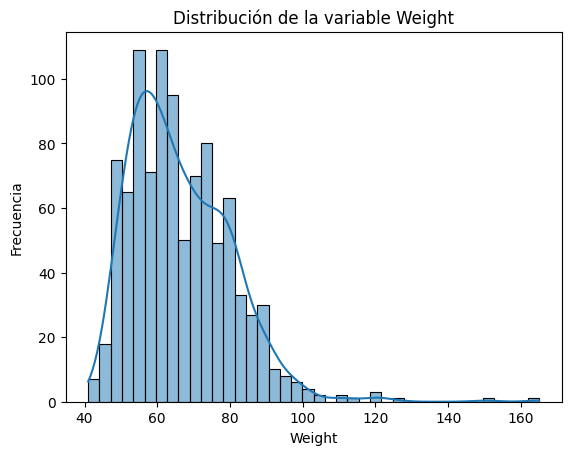

In [43]:
plt.figure()
sns.histplot(response_df['Weight'].dropna(), bins=40, kde=True)
plt.title('Distribución de la variable Weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.show()

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [44]:
response_df['Weight'].skew()

1.2237251927527477

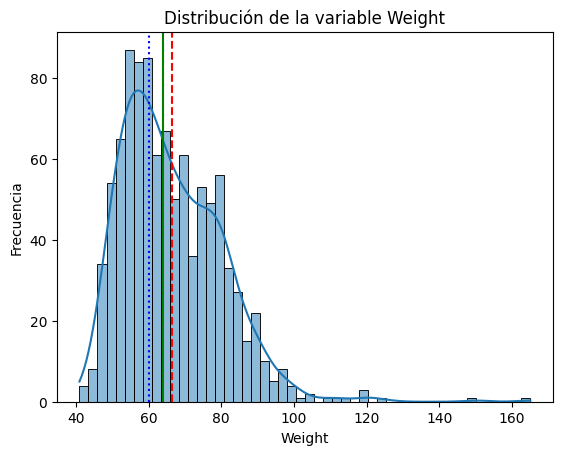

In [45]:
mean = response_df['Weight'].mean()
median = response_df['Weight'].median()
mode = response_df['Weight'].mode()[0]

plt.figure()
sns.histplot(response_df['Weight'].dropna(), bins=50, kde=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Mediana: {median:.2f}')
plt.axvline(mode, color='blue', linestyle=':', label=f'Moda: {mode:.2f}')
plt.title('Distribución de la variable Weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.show()

*De acuerdo con el calculo de su simetría (1.22), su distribución es asimétrica hacia la derecha (sesgo positivo), lo cual indica una “cola” hacia valores altos.*

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [46]:
response_df['Weight'].isna().sum()

20

*Tenemos 20 valores faltantes*

In [47]:
response_df['Weight'].isnull().mean() * 100

1.9801980198019802

*Lo que representa el 1.9% de los valores totales*

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [48]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [49]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

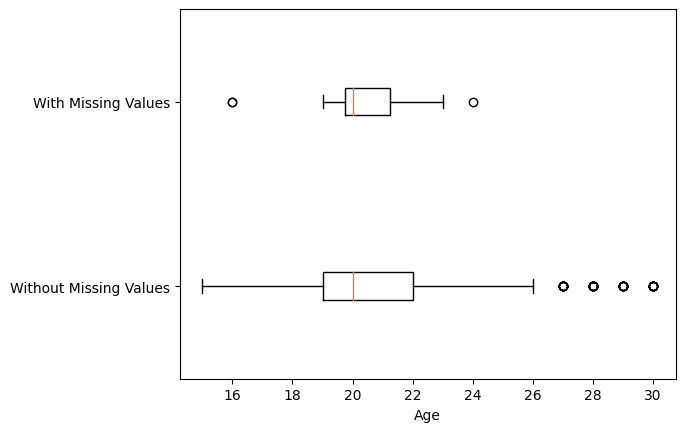

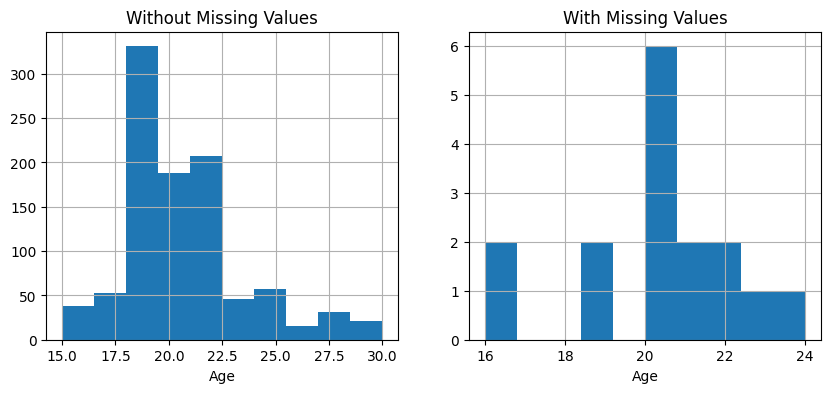

p-value of t-test: 0.7258243979822129


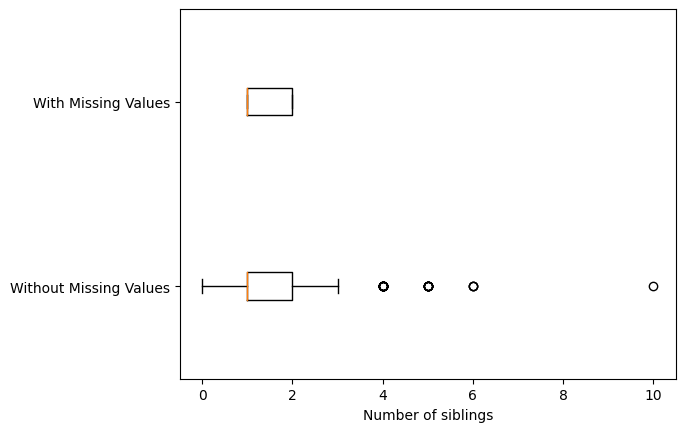

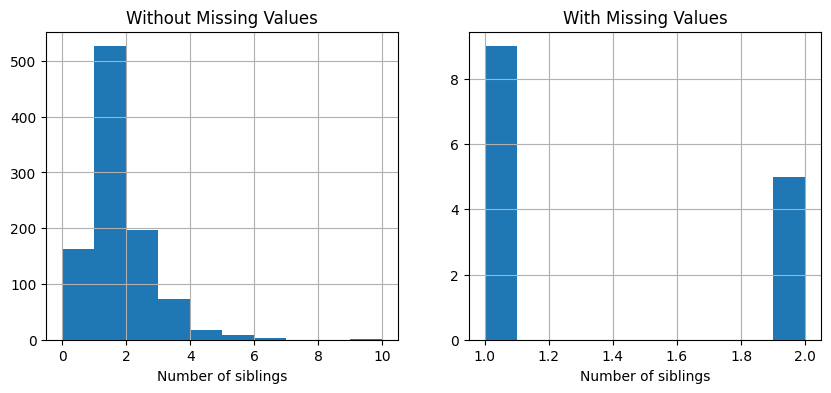

p-value of t-test: 0.8255092107556896


In [50]:
Diagnose_MV_Numerical(response_df, 'Age', response_df['Weight'].isna())
Diagnose_MV_Numerical(response_df, 'Number of siblings', response_df['Weight'].isna())

*Al ser ambos p-values mayores que 0.05, no hay evidencia estadística para afirmar que la media de Age o Number of siblings difiere significativamente entre los grupos con y sin valores faltantes en Weight.*

*Por lo tanto los valores faltantes en Weight no están relacionados con estas variables numéricas.*

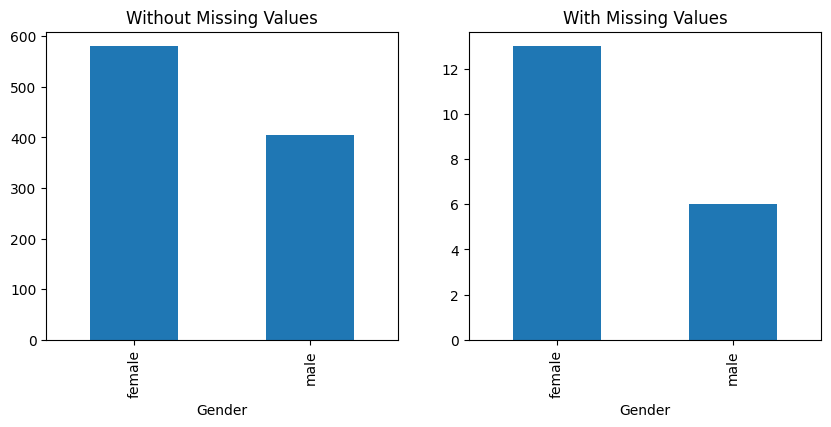

p-value of Chi_squared test: 0.5472167199163878


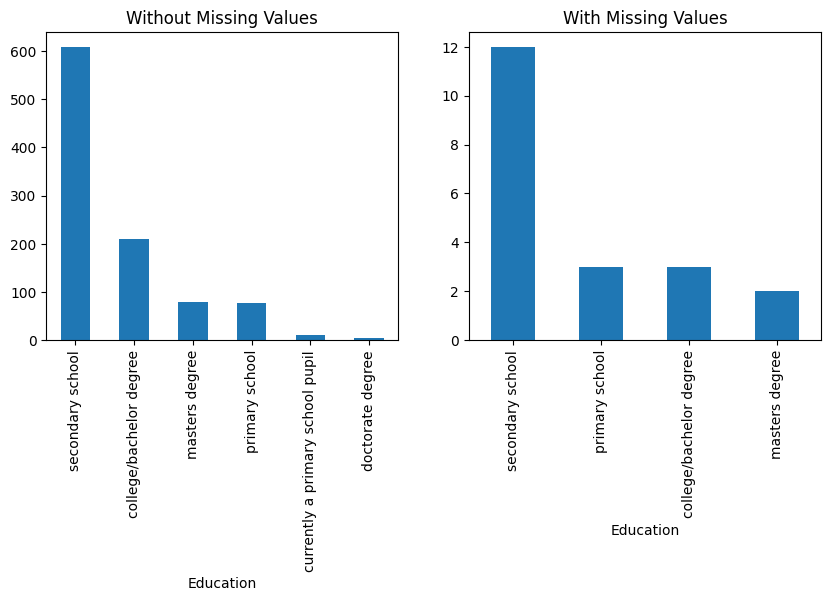

p-value of Chi_squared test: 0.8424822989541867


In [51]:
Diagnose_MV_Categorical(response_df, 'Gender', response_df['Weight'].isna())
Diagnose_MV_Categorical(response_df, 'Education', response_df['Weight'].isna())

*Igual que con las variables numéricas, estos p-values mayores que 0.05 indican que no hay diferencias significativas en la distribución de Gender o Education entre los grupos con y sin valores en Weight.*

*Por lo tanto los valores faltantes en Weight tampoco están relacionados con estas variables categóricas.*

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [52]:
mediana_weight = response_df['Weight'].median()
response_df['Weight'].fillna(mediana_weight, inplace=True)

<ipython-input-52-c19526bb29b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  response_df['Weight'].fillna(mediana_weight, inplace=True)


In [53]:
response_df['Weight'].isna().sum()

0

*Como vimos en clase, Weight al tener una distribucion sesgada o asimetrica lo mas recomendable es usa la mediana que es mas resistente a los valores atipicos, como la variable Weight tiene un sesgo positivo, indica que hay valores altos que pueden distorsionar la media, haciendo que esta no sea representativa del “peso típico”.*

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

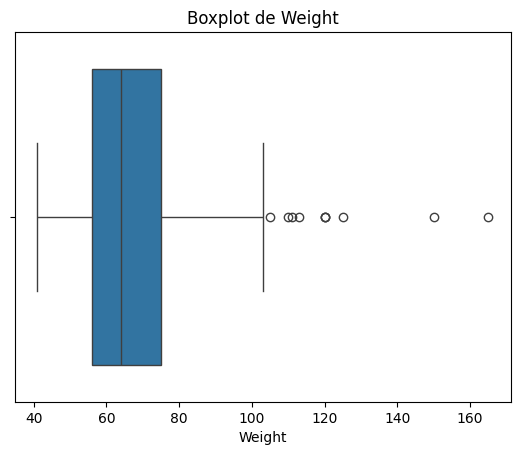

In [54]:
plt.figure()
sns.boxplot(data=response_df, x='Weight')
plt.title('Boxplot de Weight')
plt.xlabel('Weight')
plt.show()

In [55]:
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = ((response_df['Weight'] < lower_limit) | (response_df['Weight'] > upper_limit))
outliers_weight = response_df[outliers]
outliers_weight.shape[0]

10

In [56]:
response_df = response_df[~outliers]

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

*De la misma forma que con la variable Weight, la variable Height tambien tiene valores faltantes:*

In [57]:
response_df['Height'].isna().sum()

19

*Por lo que eh decididio hacer el analisis necesario para imputar los valores*

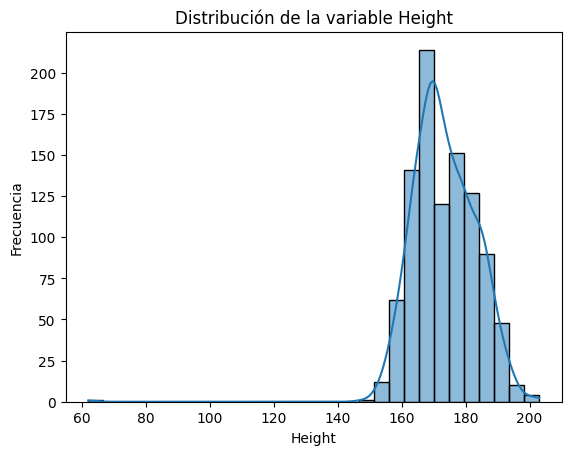

In [58]:
plt.figure()
sns.histplot(response_df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribución de la variable Height')
plt.xlabel('Height')
plt.ylabel('Frecuencia')
plt.show()

In [59]:
response_df['Height'].skew()

-1.1854429890162537

*Podemos ver que tiene un sesgo moderadamente negativo, por lo tanto podemos usar la diana para imputar sus valores faltantes*

In [60]:
response_df['Height'].fillna(response_df['Height'].median(), inplace=True)

<ipython-input-60-423e2a961955>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  response_df['Height'].fillna(response_df['Height'].median(), inplace=True)
<ipython-input-60-423e2a961955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Height'].fillna(response_df['Height'].median(), inplace=True)


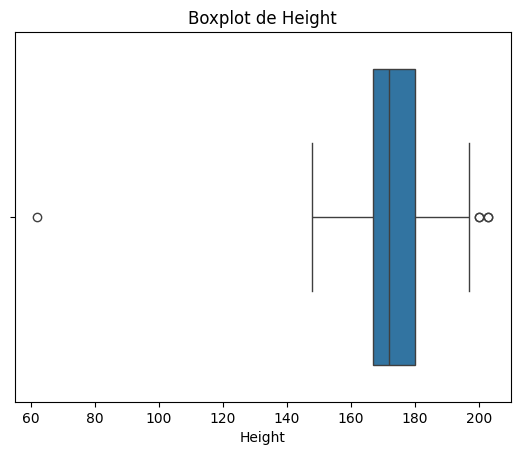

In [61]:
plt.figure()
sns.boxplot(data=response_df, x='Height')
plt.title('Boxplot de Height')
plt.xlabel('Height')
plt.show()

In [62]:
Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = ((response_df['Height'] < lower_limit) | (response_df['Height'] > upper_limit))
outliers_height = response_df[outliers]
outliers_height.shape[0]

5

In [63]:
response_df = response_df[~outliers]

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [73]:
response_df['Height (meters)'] = response_df['Height'] / 100
response_df['BMI'] = response_df['Weight'] / (response_df['Height (meters)'] / 100) ** 2

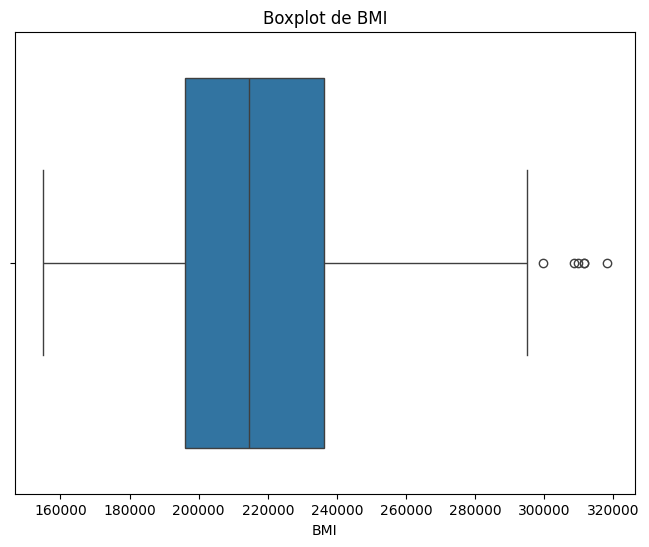

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=response_df, x='BMI')
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()

In [75]:
Q1 = response_df['BMI'].quantile(0.25)
Q3 = response_df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = ((response_df['BMI'] < lower_limit) | (response_df['BMI'] > upper_limit))
outliers_bmi = response_df[outliers]
outliers_bmi.shape[0]

6

*Encontramos 6 encuestados con valores atipicos*

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

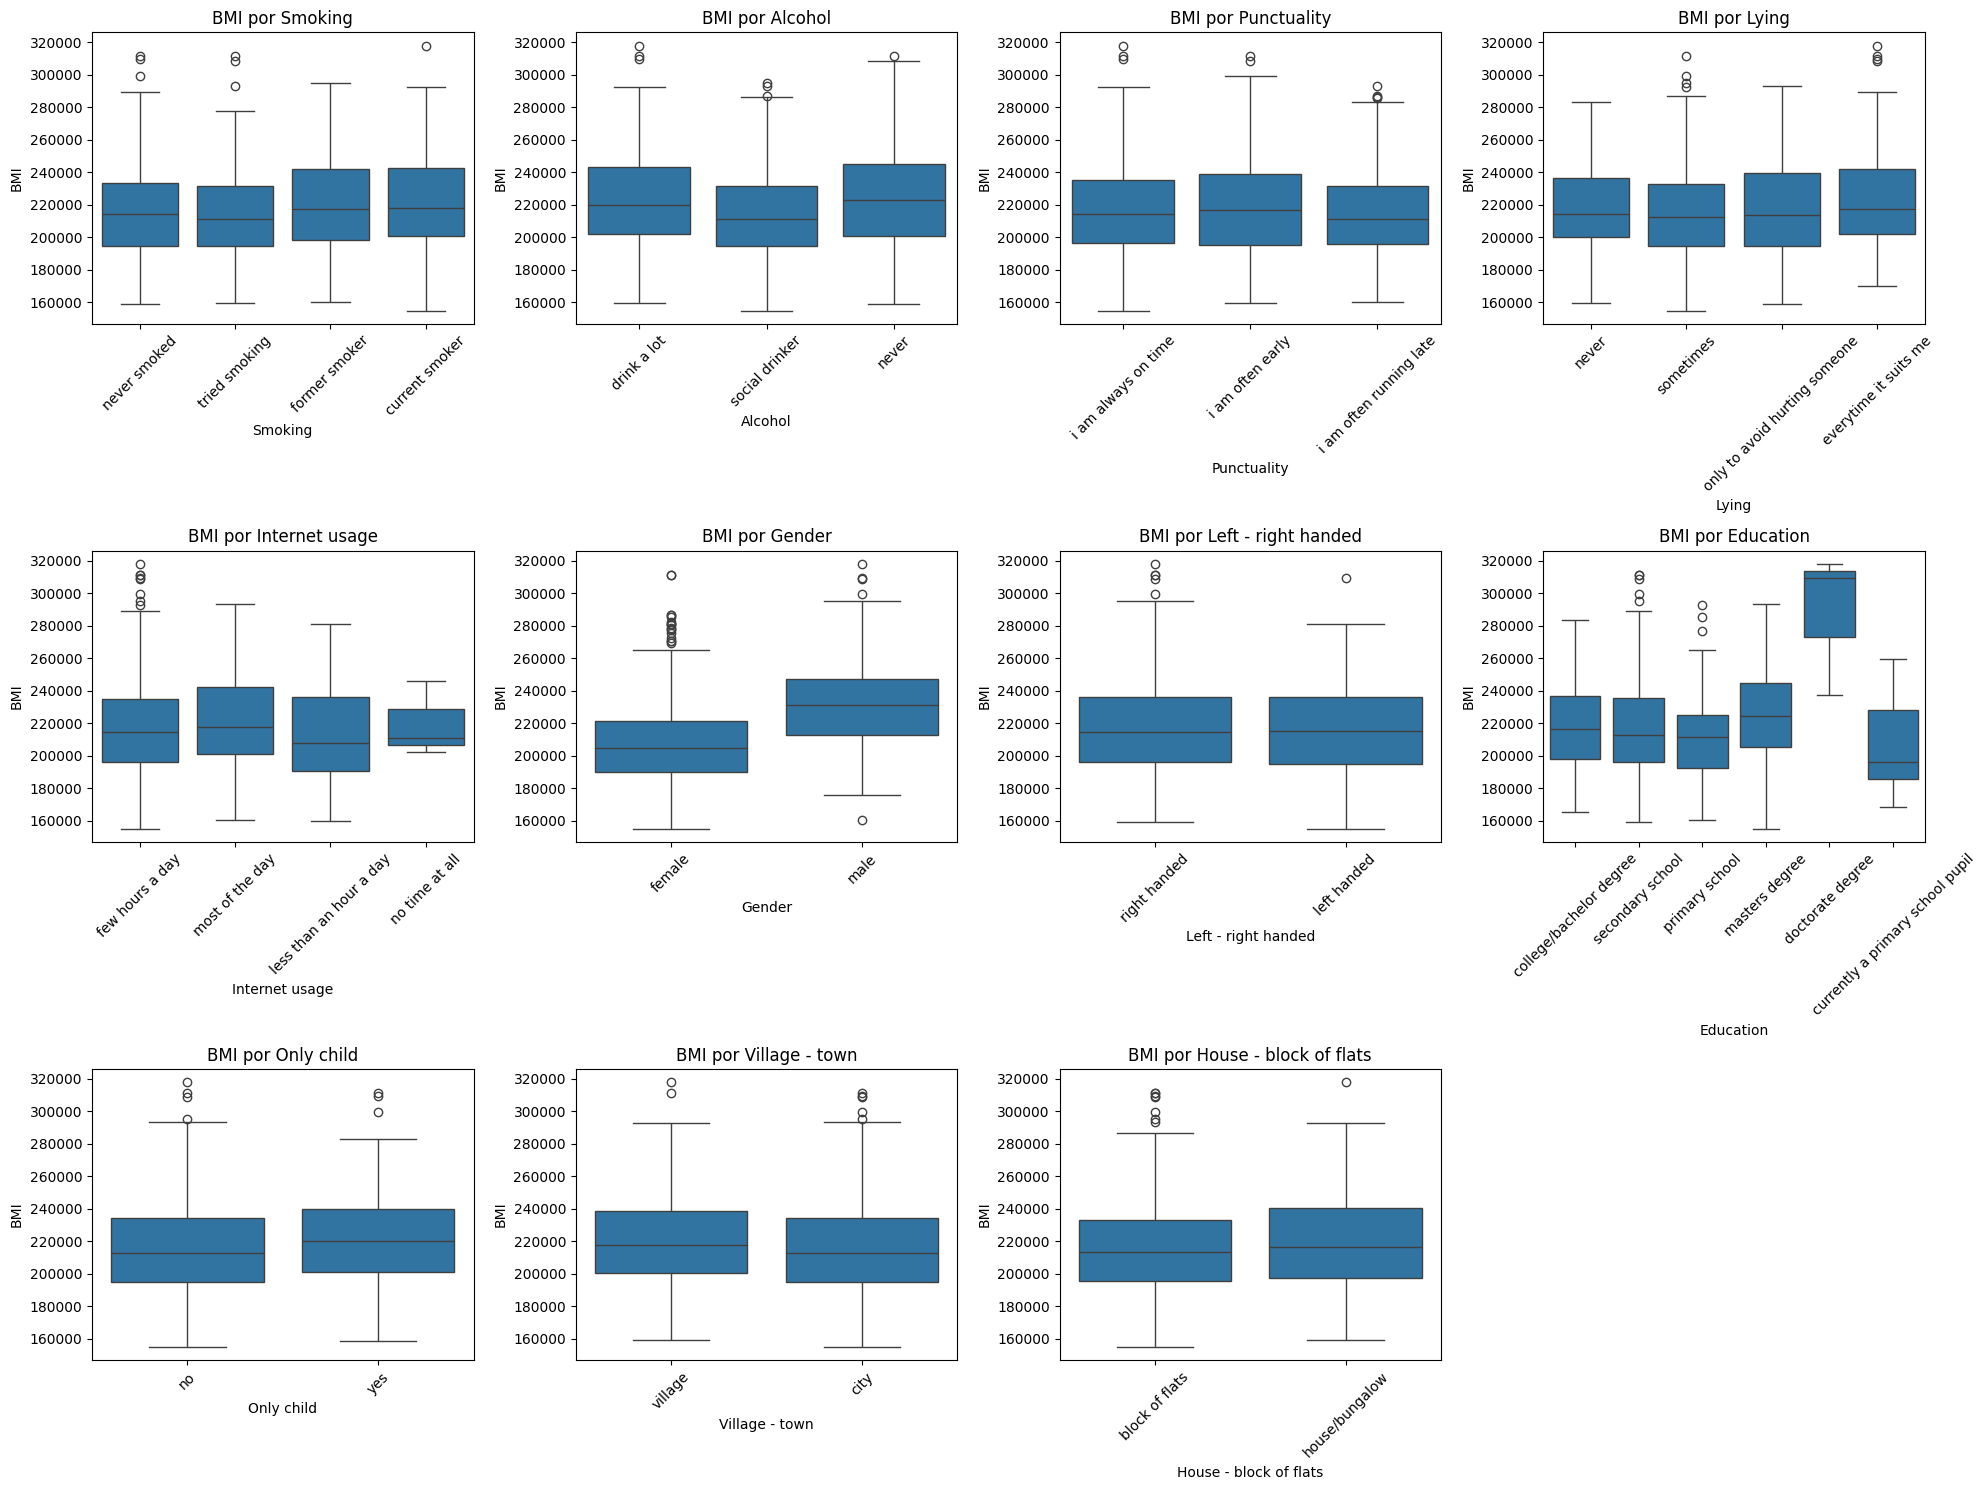

In [77]:
categorical_columns = response_df.select_dtypes(include='object').columns

num_cols = 4
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=col, y='BMI', data=response_df)
    plt.title(f'BMI por {col}')
    plt.xticks(rotation=45)
    plt.ylabel('BMI')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

*Observando los boxplots, es interesante notar que las variables Education y Gender muestran una mayor variabilidad en el BMI. En Education, se observa un incremento en los valores de BMI que tiende a estar asociado con niveles de estudios superiores. Esto podría indicar que, a medida que aumenta el nivel educativo, también puede incrementarse el índice de masa corporal en algunos casos. En Gender, se percibe una inclinación hacia valores de BMI más altos en el género masculino, lo que sugiere que los hombres, en general, presentan un BMI más elevado en esta muestra en comparación con las mujeres.*